In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import random
import os
from sklearn.model_selection import train_test_split

In [2]:
print(os.getcwd())
os.chdir('c:\\Users\\Gyanprakash\\Desktop\\Data-Science\\NLP')

c:\Users\Gyanprakash\Desktop\Data-Science\NLP\RNN


In [3]:
df = pd.read_csv(r'LSTM/fake_news_classifier/train.csv')

In [4]:
def random_values(feature_name:str,end=6):
    for i in range(0,end):
        # print(df[feature_name].sample(end))
        indx = np.random.randint(df.shape[0])
        print(f'{indx}: {df[feature_name].iloc[indx]}')

In [5]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [19]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [20]:
df = df.dropna()
df.reset_index(inplace=True)

In [21]:
df.isnull().sum()

index     0
id        0
title     0
author    0
text      0
label     0
dtype: int64

In [22]:
df.shape

(18285, 6)

In [23]:
print(df.shape)
df = df.iloc[:5000]
print(df.shape)

(18285, 6)
(5000, 6)


In [24]:
X = df['title']
df = df.drop('index',axis=1)
y = df['label']
X

0       House Dem Aide: We Didn’t Even See Comey’s Let...
1       FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                       Why the Truth Might Get You Fired
3       15 Civilians Killed In Single US Airstrike Hav...
4       Iranian woman jailed for fictional unpublished...
                              ...                        
4995    The Arcturian Group by Marilyn Raffaele Octobe...
4996    Comment on Rachel Maddow declares that a Trump...
4997    HILLARY CLINTON is being funded by the same Mu...
4998                        Предикторские свойства толпы?
4999    Even If You Hate Trump, What this Leftist Just...
Name: title, Length: 5000, dtype: object

In [26]:
## tensorflow
from keras.layers import (Embedding,
                          LSTM,
                          Dense,
                          Bidirectional)

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer

## NLTK
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tqdm import tqdm

In [27]:
ps = PorterStemmer()

In [29]:
## Preprocessing
corpus = []
for i in tqdm(range(0,len(X))):
    txt = re.sub('[^a-zA-Z]',' ',X[i])
    txt = txt.lower()
    txt = txt.split()
    print(txt)
    txt = [ps.stem(word) for word in txt if not word in stopwords.words('english')]
    txt = ' '.join(txt)
    corpus.append(txt)
    

  1%|          | 40/5000 [00:00<00:12, 392.97it/s]

['house', 'dem', 'aide', 'we', 'didn', 't', 'even', 'see', 'comey', 's', 'letter', 'until', 'jason', 'chaffetz', 'tweeted', 'it']
['flynn', 'hillary', 'clinton', 'big', 'woman', 'on', 'campus', 'breitbart']
['why', 'the', 'truth', 'might', 'get', 'you', 'fired']
['civilians', 'killed', 'in', 'single', 'us', 'airstrike', 'have', 'been', 'identified']
['iranian', 'woman', 'jailed', 'for', 'fictional', 'unpublished', 'story', 'about', 'woman', 'stoned', 'to', 'death', 'for', 'adultery']
['jackie', 'mason', 'hollywood', 'would', 'love', 'trump', 'if', 'he', 'bombed', 'north', 'korea', 'over', 'lack', 'of', 'trans', 'bathrooms', 'exclusive', 'video', 'breitbart']
['beno', 't', 'hamon', 'wins', 'french', 'socialist', 'party', 's', 'presidential', 'nomination', 'the', 'new', 'york', 'times']
['a', 'back', 'channel', 'plan', 'for', 'ukraine', 'and', 'russia', 'courtesy', 'of', 'trump', 'associates', 'the', 'new', 'york', 'times']
['obama', 's', 'organizing', 'for', 'action', 'partners', 'with'

  3%|▎         | 142/5000 [00:00<00:11, 428.34it/s]

['hillary', 'clinton', 'builds', 'million', 'war', 'chest', 'doubling', 'donald', 'trump', 'the', 'new', 'york', 'times']
['trump', 'catches', 'what', 'sick', 'reporter', 'snuck', 'in', 'interview', 'has', 'priceless', 'response']
['all', 'senators', 'contacted', 'russian', 'government', 'this', 'week']
['images', 'that', 'perfectly', 'illustrate', 'the', 'struggle', 'against', 'the', 'dakota', 'access', 'pipeline']
['washington', 'state', 'takes', 'refugees', 'muslim', 'rest', 'of', 'country', 'takes', 'refugees', 'muslim', 'breitbart']
['ncaa', 'big', 'keeps', 'watchful', 'eye', 'on', 'texas', 'bathroom', 'bill', 'breitbart']
['massive', 'espn', 'financial', 'subscriber', 'losses', 'drag', 'down', 'disney', 's', 'first', 'quarter', 'sales', 'breitbart']
['megyn', 'kelly', 'contract', 'set', 'to', 'expire', 'next', 'year', 'is', 'primed', 'for', 'the', 'big', 'show', 'the', 'new', 'york', 'times']
['teacher', 'suspended', 'for', 'allowing', 'students', 'to', 'hit', 'trump', 'pinata', 

  5%|▍         | 232/5000 [00:00<00:11, 403.23it/s]

['art', 'laffer', 'paul', 'ryan', 's', 'just', 'about', 'perfect', 'right', 'now', 'breitbart']
['how', 'donald', 'trump', 'will', 'be', 'blamed', 'for', 'economic', 'crash']
['pokemon', 'go', 'players', 'are', 'inadvertently', 'stopping', 'people', 'committing', 'suicide', 'in', 'japan']
['california', 'senate', 'race', 'is', 'a', 'tale', 'of', 'diversity', 'and', 'a', 'flailing', 'g', 'o', 'p', 'the', 'new', 'york', 'times']
['exclusive', 'source', 'says', 'megyn', 'kelly', 'would', 'not', 'be', 'welcomed', 'back', 'at', 'fox', 'news']
['in', 'break', 'with', 'precedent', 'obama', 'envoys', 'are', 'denied', 'extensions', 'past', 'inauguration', 'day', 'the', 'new', 'york', 'times']
['how', 'will', 'brexit', 'vote', 'go', 'monty', 'python', 'may', 'offer', 'clue', 'the', 'new', 'york', 'times']
['blind', 'mystic', 'who', 'predicted', 'has', 'bad', 'news', 'about', 'trump']
['total', 'vetting', 'fail', 'left', 'wing', 'snowden', 'fan', 'girl', 'reality', 'winner', 'gets', 'access', 'to

  6%|▋         | 314/5000 [00:00<00:12, 384.20it/s]

['achieving', 'mindfulness', 'at', 'work', 'no', 'meditation', 'cushion', 'required', 'the', 'new', 'york', 'times']
['world', 's', 'first', 'zero', 'emissions', 'hydrogen', 'powered', 'passenger', 'train', 'unveiled', 'in', 'germany']
['confused', 'by', 'chip', 'credit', 'cards', 'get', 'in', 'line', 'the', 'new', 'york', 'times']
['brooks', 'trump', 'siding', 'with', 'a', 'foreign', 'leader', 'against', 'the', 'us', 'president', 'on', 'israel', 'and', 'russia', 'breitbart']
['there', 's', 'toxic', 'air', 'in', 'your', 'home', 'and', 'this', 'is', 'you', 'can', 'get', 'rid', 'of', 'it', 'naturally']
['a', 'connecticut', 'reader', 'reports', 'record', 'voter', 'registration', 'inspired', 'by', 'trump']
['germany', 'reacts', 'to', 'merkel', 'trump', 'visit', 'could', 'have', 'been', 'a', 'lot', 'worse', 'the', 'new', 'york', 'times']
['justin', 'rose', 'outduels', 'henrik', 'stenson', 'for', 'golf', 'gold', 'medal', 'the', 'new', 'york', 'times']
['iceland', 's', 'water', 'cure', 'the',

  8%|▊         | 409/5000 [00:00<00:10, 428.58it/s]

['twitter', 'sues', 'the', 'government', 'to', 'block', 'the', 'unmasking', 'of', 'an', 'account', 'critical', 'of', 'trump', 'the', 'new', 'york', 'times']
['warriors', 'resilient', 'at', 'home', 'cruise', 'against', 'the', 'cavaliers', 'the', 'new', 'york', 'times']
['comey', 'letter', 'on', 'clinton', 'email', 'is', 'subject', 'of', 'justice', 'dept', 'inquiry', 'the', 'new', 'york', 'times']
['spain', 'malta', 'under', 'u', 's', 'uk', 'pressure', 'refuse', 'to', 'allow', 'russian', 'carrier', 'group', 'to', 'refuel', 'in', 'their', 'ports']
['review', 'in', 'radiohead', 's', 'a', 'moon', 'shaped', 'pool', 'patient', 'perfectionism', 'the', 'new', 'york', 'times']
['this', 'is', 'the', 'man', 'militarized', 'police', 'at', 'standing', 'rock', 'are', 'working', 'for']
['woman', 'arrested', 'on', 'own', 'property', 'after', 'her', 'land', 'was', 'stolen', 'by', 'dapl']
['pulitzer', 'prizes', 'new', 'york', 'times', 'wins', 'daily', 'news', 'and', 'propublica', 'share', 'public', 'serv

 10%|█         | 505/5000 [00:01<00:11, 406.48it/s]

['when', 'barack', 'obama', 'plagiarized', 'don', 't', 'tell', 'me', 'words', 'don', 't', 'matter', 'breitbart']
['lower', 'back', 'ache', 'be', 'active', 'and', 'wait', 'it', 'out', 'new', 'guidelines', 'say', 'the', 'new', 'york', 'times']
['if', 'i', 'sleep', 'for', 'an', 'hour', 'people', 'will', 'die', 'the', 'new', 'york', 'times']
['veep', 'season', 'episode', 'do', 'a', 'little', 'dance', 'the', 'new', 'york', 'times']
['on', 'dr', 'oz', 'trump', 'offers', 'placebo', 'transparency', 'the', 'new', 'york', 'times']
['comment', 'on', 'gold', 'medalist', 'wrestler', 'gets', 'violent', 'with', 'police', 'all', 'cops', 'choose', 'not', 'to', 'engage', 'in', 'deadly', 'force', 'by', 'buck', 'rogers']
['one', 'year', 'of', 'water', 'in', 'orange', 'county', 'in', 'just', 'four', 'days', 'breitbart']
['doctors', 'with', 'enemies', 'did', 'afghan', 'forces', 'target', 'the', 'm', 's', 'f', 'hospital', 'the', 'new', 'york', 'times']
['year', 'old', 'hebrew', 'mention', 'of', 'jerusalem', 

 11%|█         | 547/5000 [00:01<00:11, 389.45it/s]

['california', 'today', 'a', 'view', 'of', 'san', 'francisco', 's', 'leaning', 'tower', 'from', 'space', 'the', 'new', 'york', 'times']
['matthews', 'trump', 's', 'speech', 'what', 'putin', 'has', 'been', 'saying', 'america', 'first', 'has', 'hitlerian', 'background', 'breitbart']
['vladimir', 'putin', 'at', 'the', 'valdai', 'international', 'discussion', 'club', 'shaping', 'the', 'world', 'of', 'tomorrow', 'by', 'vladimir', 'putin']
['chinese', 'social', 'media', 'rages', 'over', 'united', 'airlines', 'controversy', 'breitbart']
['america', 'is', 'better', 'without', 'borders']
['more', 'than', 'chaos', 'terror', 'ties', 'make', 'venezuela', 'direct', 'threat', 'to', 'usa', 'former', 'un', 'security', 'council', 'president', 'says', 'breitbart']
['rick', 'ross', 'documentary', 'video', 'doubles', 'as', 'ad', 'for', 'checkers', 'the', 'new', 'york', 'times']
['oil', 'has', 'been', 'spilling', 'into', 'the', 'pacific', 'ocean', 'since', 'last', 'month', 'and', 'its', 'being', 'totally',

 12%|█▏        | 623/5000 [00:01<00:12, 340.28it/s]

['prescription', 'painkiller', 'deaths', 'dropped', 'in', 'states', 'that', 'legalized', 'marijuana']
['we', 're', 'in', 'a', 'low', 'growth', 'world', 'how', 'did', 'we', 'get', 'here', 'the', 'new', 'york', 'times']
['istanbul', 'donald', 'trump', 'benjamin', 'netanyahu', 'your', 'morning', 'briefing', 'the', 'new', 'york', 'times']
['hitler', 'or', 'hillary']
['dalian', 'wanda', 's', 'hollywood', 'event', 'is', 'itself', 'a', 'production', 'the', 'new', 'york', 'times']
['comment', 'on', 'pm', 'water', 'cooler', 'by', 'timmy']
['breakdown', 'of', 'the', 'clinton', 'money', 'machine']
['california', 'at', 'forefront', 'of', 'climate', 'fight', 'won', 't', 'back', 'down', 'to', 'trump', 'the', 'new', 'york', 'times']
['g', 'e', 'the', 'year', 'old', 'software', 'start', 'up', 'the', 'new', 'york', 'times']
['for', 'hillary', 'clinton', 'at', 'hamilton', 'that', 'would', 'be', 'enough', 'the', 'new', 'york', 'times']
['brain', 'concussions', 'in', 'children', 'and', 'adults', 'what', '

 15%|█▍        | 748/5000 [00:01<00:10, 391.95it/s]

['more', 'than', 'trillion', 'in', 'new', 'debt', 'in', 'days']
['tory', 'councillor', 'say', 'homeless', 'people', 'should', 'be', 'eliminated']
['review', 'in', 'hillbilly', 'elegy', 'a', 'tough', 'love', 'analysis', 'of', 'the', 'poor', 'who', 'back', 'trump', 'the', 'new', 'york', 'times']
['criminal', 'in', 'chief']
['all', 'governments', 'lie', 'the', 'movie']
['trump', 'and', 'brexit', 'defeat', 'globalism', 'for', 'now', 'anyway']
['facing', 'congress', 'some', 'sports', 'officials', 'not', 'all', 'begin', 'to', 'confront', 'sexual', 'abuse', 'the', 'new', 'york', 'times']
['airbnb', 'ends', 'fight', 'with', 'new', 'york', 'city', 'over', 'fines', 'the', 'new', 'york', 'times']
['big', 'pharma', 's', 'martin', 'shkreli', 'suspended', 'from', 'twitter', 'breitbart']
['next', 'big', 'tech', 'corridor', 'between', 'seattle', 'and', 'vancouver', 'planners', 'hope', 'the', 'new', 'york', 'times']
['evidence', 'that', 'robots', 'are', 'winning', 'the', 'race', 'for', 'american', 'job

 16%|█▌        | 790/5000 [00:02<00:10, 396.67it/s]

['russian', 'scientists', 'will', 'track', 'sea', 'lions', 'from', 'space']
['by', 'seizing', 'the', 'definition', 'of', 'populism', 'reuters', 'warns', 'us', 'of', 'chaos', 'to', 'come']
['seaworthy', 'and', 'ready', 'for', 'an', 'early', 'unveiling', 'the', 'new', 'york', 'times']
['donald', 'trump', 'adds', 'k', 't', 'mcfarland', 'to', 'his', 'national', 'security', 'team', 'the', 'new', 'york', 'times']
['snowstorm', 'brings', 'wintry', 'mix', 'of', 'slush', 'and', 'gripes', 'the', 'new', 'york', 'times']
['republicans', 'wilders', 'tillerson', 'your', 'thursday', 'evening', 'briefing', 'the', 'new', 'york', 'times']
['review', 'bryan', 'cranston', 'shines', 'as', 'lyndon', 'johnson', 'in', 'all', 'the', 'way', 'the', 'new', 'york', 'times']
['samsung', 'urges', 'consumers', 'to', 'stop', 'using', 'galaxy', 'note', 's', 'after', 'battery', 'fires', 'the', 'new', 'york', 'times']
['election', 'result', 'discussion', 'for', 'the', 'presidential', 'election', 'open', 'thread']
['ag', 

 17%|█▋        | 870/5000 [00:02<00:11, 366.06it/s]

['democrats', 'with', 'garland', 'on', 'mind', 'mobilize', 'for', 'supreme', 'court', 'fight', 'the', 'new', 'york', 'times']
['comment', 'on', 'of', 'the', 'best', 'kinds', 'of', 'milk', 'that', 'aren', 't', 'dairy', 'by', 'of', 'the', 'best', 'kinds', 'of', 'milk', 'that', 'aren', 't', 'dairy', 'collective', 'evolution', 'apg', 'editorial']
['harry', 'reid', 'blasts', 'comey', 'for', 'misconduct', 'drops', 'bombshell', 'fbi', 'is', 'sitting', 'on', 'russian', 'trump', 'info']
['national', 'review', 'conservatism', 'inc', 'plan', 'to', 'cave', 'even', 'more', 'on', 'immigration']
['watch', 'thug', 'calls', 'us', 'marine', 'a', 'pussy', 'barely', 'lives', 'to', 'tell', 'the', 'tale']
['will', 'the', 'next', 'us', 'president', 'be', 'a', 'psycho', 'lesbian', 'plus', 'breaking', 'news', 'videos']
['critics', 'see', 'efforts', 'by', 'counties', 'and', 'towns', 'to', 'purge', 'minority', 'voters', 'from', 'rolls', 'the', 'new', 'york', 'times']
['your', 'evening', 'briefing', 'hillary', 'c

 19%|█▉        | 947/5000 [00:02<00:10, 372.12it/s]

['fake', 'news', 'new', 'york', 'times', 'targets', 'breitbart', 'for', 'reporting', 'truth', 'breitbart']
['after', 'blast', 'new', 'yorkers', 'examine', 'themselves', 'for', 'psychological', 'shrapnel', 'the', 'new', 'york', 'times']
['resistance', 'schwarzenegger', 'calls', 'for', 'grassroots', 'revolution', 'after', 'u', 's', 'exits', 'paris', 'agreement']
['virginia', 'officials', 'request', 'u', 's', 'inquiry', 'after', 'inmate', 'deaths', 'in', 'jail', 'the', 'new', 'york', 'times']
['how', 'to', 'report', 'voter', 'fraud', 'crash', 'course']
['associated', 'press', 'reporter', 'admits', 'faking', 'news', 'stories', 'for', 'hillary', 'clinton']
['review', 'garth', 'brooks', 'brings', 'rousing', 'anthems', 'and', 'ballads', 'to', 'yankee', 'stadium', 'the', 'new', 'york', 'times']
['sicher', 'trainieren', 'beim', 'spinning', 'gilt', 'ab', 'sofort', 'helmpflicht']
['every', 'asset', 'class', 'will', 'collapse', 'you', 'need', 'to', 'be', 'looking', 'at', 'your', 'wealth', 'in', 't

 21%|██        | 1034/5000 [00:02<00:10, 382.60it/s]

['as', 'donald', 'trump', 'incites', 'feuds', 'other', 'g', 'o', 'p', 'candidates', 'flee', 'his', 'shadow', 'the', 'new', 'york', 'times']
['germany', 'students', 'forced', 'to', 'chant', 'allahu', 'akbar', 'punished', 'for', 'refusing', 'trip', 'to', 'mosque']
['meteor', 'space', 'junk', 'rocket', 'mysterious', 'flash', 'hits', 'siberia']
['trump', 'national', 'security', 'adviser', 'called', 'russian', 'envoy', 'day', 'before', 'sanctions', 'were', 'imposed', 'the', 'new', 'york', 'times']
['project', 'veritas', 'implicated', 'democratic', 'operatives', 'claim', 'credit', 'for', 'romney', 'video']
['laid', 'off', 'americans', 'required', 'to', 'zip', 'lips', 'on', 'way', 'out', 'grow', 'bolder', 'the', 'new', 'york', 'times']
['williams', 'sisters', 'could', 'be', 'in', 'step', 'for', 'semifinal', 'showdown', 'at', 'u', 's', 'open', 'the', 'new', 'york', 'times']
['art', 'underground', 'a', 'first', 'look', 'at', 'the', 'second', 'avenue', 'subway', 'the', 'new', 'york', 'times']
['

 22%|██▏       | 1121/5000 [00:02<00:09, 401.07it/s]

['afghan', 'response', 'to', 'female', 'pilot', 's', 'u', 's', 'asylum', 'case', 'i', 'am', 'sure', 'she', 'lied', 'the', 'new', 'york', 'times']
['first', 'contact', 'film', 'trailer']
['did', 'hillary', 'clinton', 'cheat', 'at', 'the', 'debate', 'video']
['the', 'eurasian', 'economic', 'union', 'a', 'new', 'power', 'in', 'the', 'asia', 'pacific', 'region', 'new', 'eastern', 'outlook']
['chris', 'rock', 'returns', 'with', 'jokes', 'and', 'personal', 'anguish', 'the', 'new', 'york', 'times']
['trump', 'sons', 'forge', 'ahead', 'without', 'father', 'expanding', 'and', 'navigating', 'conflicts', 'the', 'new', 'york', 'times']
['this', 'is', 'why', 'most', 'analysts', 'gold', 'silver', 'price', 'forecasts', 'are', 'wrong']
['how', 'far', 'are', 'we', 'from', 'war', 'with', 'russia', 'over', 'syria']
['in', 'israel', 'lauding', 'and', 'lamenting', 'the', 'era', 'of', 'trump', 'the', 'new', 'york', 'times']
['universal', 'child', 'season', 'episode', 'hosted', 'by', 'joanna', 'l', 'ross', '

 24%|██▍       | 1209/5000 [00:03<00:09, 389.32it/s]

['comey', 'crawl', 'd', 'c', 'bars', 'plan', 'testimony', 'drink', 'special', 'bonanza', 'on', 'thursday', 'morning', 'breitbart']
['bomsbhell', 'clintons', 'fixer', 'proves', 'that', 'hillary', 's', 'secret', 'affair', 'ended', 'in', 'the', 'murder', 'of', 'her', 'lover']
['comment', 'on', 'eric', 'trump', 'a', 'candidate', 'under', 'investigation', 'is', 'unthinkable', 'by', 'debbie', 'menon']
['syrian', 'refugee', 'with', 'four', 'wives', 'and', 'children', 'claims', 'a', 'year', 'in', 'benefits']
['indiana', 'ymca', 'removes', 'cnn', 'from', 'tvs', 'over', 'complaints', 'about', 'fake', 'news', 'breitbart']
['reasons', 'to', 'drink', 'lemon', 'water', 'on', 'an', 'empty', 'stomach']
['trump', 'is', 'deadbeating', 'on', 'his', 'campaign', 'debts', 'by', 'refusing', 'to', 'pay', 'his', 'own', 'pollster']
['u', 's', 'military', 'hackers', 'report', 'having', 'penetrated', 'russia', 's', 'electric', 'grid', 'communications', 'networks', 'encase']
['senators', 'push', 'to', 'broaden', '

 26%|██▌       | 1286/5000 [00:03<00:10, 355.32it/s]

['klukowski', 'nuclear', 'option', 'restores', 'constitutional', 'balance']
['america', 'votes', 'against', 'empire']
['world', 'war', 'alert', 'u', 's', 'navy', 's', 'new', 'billion', 'weapon', 'will', 'dominate', 'the', 'south', 'china', 'sea']
['analyst', 'why', 'turkey', 'opening', 'border', 'to', 'millions', 'migrants', 'into', 'europe', 'is', 'a', 'good', 'thing']
['survey', 'shows', 'social', 'isolation', 'sexual', 'rejection', 'but', 'much', 'sympathy', 'for', 'transgender', 'americans', 'breitbart']
['house', 'democrats', 'conceal', 'election', 'autopsy', 'from', 'public', 'breitbart']
['number', 'of', 'refugees', 'admitted', 'into', 'u', 's', 'increased', 'by', 'nineteen', 'percent', 'in', 'may', 'slightly', 'fewer', 'are', 'muslim', 'breitbart']
['police', 'state', 'elections']
['donald', 'trump', 'democrats', 'phony', 'hypocrites', 'for', 'protesting', 'james', 'comey', 'firing', 'breitbart']
['want', 'to', 'see', 'hamilton', 'in', 'a', 'city', 'near', 'you', 'buy', 'a', 's

 27%|██▋       | 1359/5000 [00:03<00:10, 357.32it/s]

['sale', 'of', 'federal', 'mortgages', 'to', 'investors', 'puts', 'greater', 'burden', 'on', 'blacks', 'suit', 'says', 'the', 'new', 'york', 'times']
['hillary', 'clinton', 'appears', 'disoriented', 'and', 'confused', 'at', 'new', 'york', 'airport', 'day', 'before', 'presidential', 'election']
['things', 'to', 'expect', 'with', 'a', 'hillary', 'clinton', 'presidency']
['donald', 'trump', 'beat', 'expectations', 'everywhere', 'suggesting', 'a', 'broad', 'shift', 'the', 'new', 'york', 'times']
['defense', 'secretary', 'us', 'talking', 'to', 'turkey', 'about', 'future', 'role', 'in', 'raqqa']
['beyond', 'voting', 'the', 'limits', 'of', 'electoral', 'politics']
['angelina', 'jolie', 'slams', 'refugee', 'order', 'trump', 'playing', 'with', 'fire']
['another', 'pool', 'turns', 'green', 'chemical', 'imbalance', 'is', 'blamed', 'the', 'new', 'york', 'times']
['poll', 'donald', 'trump', 'bests', 'elizabeth', 'warren', 'in', 'presidential', 'matchup', 'breitbart']
['china', 'bans', 'dozens', 'of

 29%|██▉       | 1443/5000 [00:03<00:09, 376.35it/s]

['the', 'top', 'most', 'damaging', 'wikileaks']
['more', 'on', 'trump', 's', 'populism', 'and', 'how', 'it', 'can', 'be', 'controlled', 'by', 'government']
['undercover', 'muslim', 'woman', 'is', 'offered', 'to', 'commit', 'voter', 'fraud', 'for', 'hillary']
['as', 'fake', 'news', 'spreads', 'lies', 'more', 'readers', 'shrug', 'at', 'the', 'truth', 'the', 'new', 'york', 'times']
['re', 'french', 'political', 'leader', 'france', 'is', 'about', 'to', 'enter', 'a', 'holy', 'war', 'with', 'islam', 'embrace', 'christianity', 'never', 'accept', 'the', 'religion', 'of', 'satan']
['i', 'don', 't', 'know', 'but', 'does', 'he', 'the', 'hidden', 'meaning', 'of', 'trump', 's', 'words', 'the', 'new', 'york', 'times']
['video', 'locals', 'express', 'outrage', 'during', 'pledge', 'of', 'allegiance', 'and', 'opening', 'prayer', 'at', 'sen', 'bill', 'cassidy', 's', 'town', 'hall']
['comedy', 'central', 's', 'trevor', 'noah', 'on', 'ann', 'coulter', 'at', 'berkeley', 'they', 'should', 'just', 'let', 'he

 30%|███       | 1521/5000 [00:03<00:09, 371.94it/s]

['solar', 'snare', 'spend', 'thousands', 'and', 'cut', 'power', 'bills', 'by', 'a', 'month', 'the', 'new', 'york', 'times']
['are', 'voters', 'safe', 'going', 'to', 'the', 'polls']
['nbc', 'to', 'broadcast', 'olympics', 'live', 'in', 'all', 'time', 'zones', 'the', 'new', 'york', 'times']
['condemning', 'fake', 'news', 'but', 'running', 'fake', 'news', 'ads', 'the', 'new', 'york', 'times']
['it', 's', 'only', 'a', 'car']
['ashutosh', 'attempts', 'suicide', 'at', 'protest', 'rally', 'rescued', 'while', 'proofreading', 'suicide', 'note']
['explosive', 'assange', 'pilger', 'interview', 'on', 'us', 'election', 'expect', 'riots', 'if', 'hillary', 'wins']
['de', 'blasio', 'snubs', 'new', 'york', 'post', 'reporter', 'and', 'calls', 'paper', 'a', 'right', 'wing', 'rag', 'the', 'new', 'york', 'times']
['they', 'got', 'in', 'there', 'and', 'totally', 'took', 'it', 'over', 'the', 'tea', 'party', 'black', 'lives', 'matter', 'and', 'the', 'protesters', 'have', 'all', 'been', 'absorbed', 'by', 'the',

 32%|███▏      | 1603/5000 [00:04<00:08, 388.38it/s]

['sarah', 'jessica', 'parker', 'leaving', 'carrie', 'behind', 'with', 'hbo', 's', 'divorce', 'the', 'new', 'york', 'times']
['he', 'caught', 'his', 'daughter', 'lying', 'bare', 'naked', 'next', 'to', 'a', 'stranger']
['clinton', 'campaign', 'declines', 'to', 'support', 'dakota', 'pipeline', 'protesters']
['police', 'officers', 'killed', 'in', 'ambush', 'by', 'militants', 'in', 'afghanistan', 'the', 'new', 'york', 'times']
['dear', 'hillary', 'supporters', 'own', 'your', 'terrible', 'candidate']
['constitutional', 'law', 'expert', 'comey', 'did', 'not', 'violate', 'law', 'by', 'announcing', 'email', 'investigation']
['trump', 's', 'next', 'battle', 'keeping', 'these', 'republican', 'senators', 'happy', 'the', 'new', 'york', 'times']
['trump', 'thug', 'chants', 'jews', 's', 'a', 'at', 'arizona', 'rally']
['bernie', 'sanders', 'wife', 'jane', 'sanders', 'colin', 'kaepernick', 'inspired', 'respect', 'thru', 'dignified', 'stance', 'breitbart']
['isis', 'operative', 'suspected', 'in', 'paris

 34%|███▎      | 1683/5000 [00:04<00:08, 386.53it/s]

['donald', 'trump', 's', 'crucial', 'pillar', 'of', 'support', 'white', 'men', 'shows', 'weakness', 'the', 'new', 'york', 'times']
['new', 'travel', 'ban', 'garners', 'same', 'verdict', 'in', 'middle', 'east', 'a', 'slap', 'at', 'muslims', 'the', 'new', 'york', 'times']
['the', 'changeup', 'liberals', 'now', 'saying', 'espn', 's', 'liberal', 'bias', 'is', 'a', 'good', 'thing']
['with', 'gas', 'station', 's', 'closing', 'a', 'fuel', 'desert', 'expands', 'in', 'manhattan', 'the', 'new', 'york', 'times']
['sixty', 'killed', 'in', 'new', 'us', 'saudi', 'war', 'crime', 'in', 'yemen']
['new', 'emails', 'in', 'clinton', 'case', 'came', 'from', 'anthony', 'weiner', 's', 'electronic', 'devices']
['mcconnell', 'trump', 's', 'state', 'dept', 'budget', 'cuts', 'probably', 'can', 't', 'pass', 'senate', 'breitbart']
['alex', 'jones', 'declares', 'trump', 'landslide', 'victory']
['exclusive', 'wife', 'of', 'victim', 'pens', 'letter', 'to', 'donald', 'trump', 'urging', 'strength', 'during', 'saudi', '

 35%|███▌      | 1766/5000 [00:04<00:08, 391.84it/s]

['in', 'betsy', 'devos', 'for', 'education', 'trump', 'taps', 'into', 'michigan', 'royalty', 'the', 'new', 'york', 'times']
['trump', 'or', 'clinton', 'life', 'or', 'death']
['prince', 's', 'heels', 'elevated', 'him', 'as', 'a', 'style', 'icon', 'the', 'new', 'york', 'times']
['a', 'small', 'guard', 'upends', 'uconn', 'and', 'breathes', 'a', 'little', 'life', 'into', 'her', 'sport', 'the', 'new', 'york', 'times']
['usa', 'china', 'who', 'is', 'responsible', 'for', 'north', 'korean', 'nuclear', 'weapons', 'programme', 'development', 'new', 'eastern', 'outlook']
['u', 's', 'open', 'quieted', 'those', 'calling', 'for', 'a', 'roof', 'now', 'it', 'faces', 'a', 'louder', 'problem', 'the', 'new', 'york', 'times']
['australia', 'is', 'not', 'as', 'down', 'under', 'as', 'everyone', 'thinks', 'it', 'is', 'the', 'new', 'york', 'times']
['tory', 'horror', 'film', 'posters', 'to', 'send', 'a', 'chill', 'down', 'your', 'spine', 'this', 'halloween']
['pennsylvania', 'attorney', 'general', 'quits', 'o

 37%|███▋      | 1847/5000 [00:04<00:08, 386.43it/s]

[]
['the', 'giant', 'panda', 'is', 'no', 'longer', 'endangered', 'it', 's', 'vulnerable', 'the', 'new', 'york', 'times']
['supreme', 'court', 'tie', 'blocks', 'obama', 'immigration', 'plan', 'the', 'new', 'york', 'times']
['fbi', 'wants', 'you', 'to', 'believe', 'it', 'examined', 'emails', 'in', 'seconds']
['israeli', 'american', 'jewish', 'leaders', 'slam', 'un', 'secretary', 'general', 'for', 'occupation', 'statement']
['blue', 'state', 'blues', 'the', 'white', 'house', 'loves', 'the', 'russia', 'scandal', 'breitbart']
['dave', 'chappelle', 'accused', 'of', 'making', 'homophobic', 'transphobic', 'jokes', 'in', 'netflix', 'specials']
['five', 'illegal', 'aliens', 'arrested', 'after', 'shooting', 'woman', 'times', 'say', 'police']
['this', 'is', 'no', 'new', 'cold', 'war', 'it', 's', 'far', 'worse', 'than', 'that']
['this', 'city', 'is', 'latino', 'and', 'the', 'face', 'of', 'a', 'new', 'california', 'the', 'new', 'york', 'times']
['tr', 'umt', 'russland', 'heimlich', 'von', 'der', 'so

 38%|███▊      | 1924/5000 [00:05<00:08, 359.36it/s]

['at', 'least', 'civilians', 'killed', 'as', 'coalition', 'strikes', 'taliban', 'arsenal', 'officials', 'say', 'the', 'new', 'york', 'times']
['delingpole', 'facebook', 'banned', 'me', 'for', 'defending', 'milo', 'breitbart']
['bloomberg', 'backed', 'pennsylvania', 'attorney', 'general', 'sentenced', 'to', 'months', 'in', 'prison']
['republican', 'mark', 'kirk', 'just', 'lost', 'his', 'race', 'against', 'tammy', 'duckworth', 'with', 'a', 'single', 'racist', 'comment', 'video']
['eta', 'still', 'wants', 'independent', 'basque', 'nation', 'after', 'disarming']
['uk', 'to', 'teach', 'sex', 'and', 'relationship', 'education', 'to', 'kids', 'as', 'young', 'as', 'four']
['japan', 'moves', 'forward', 'on', 'bill', 'to', 'allow', 'emperor', 'akihito', 'to', 'abdicate', 'throne', 'breitbart']
['joe', 'giambrone', 'on', 'hollywood', 's', 'shameless', 'underhanded', 'assault', 'on', 'political', 'truth']
['our', 'grandmothers', 'know', 'best', 'traditional', 'remedy', 'for', 'asthma', 'bronchitis

 40%|████      | 2010/5000 [00:05<00:07, 394.29it/s]

['sc', 'gov', 'nikki', 'haley', 'announces', 'she', 's', 'voting', 'for', 'donald', 'trump']
['rush', 'limbaugh', 'ridicules', 'robert', 'reich', 'for', 'right', 'wing', 'rioters', 'claim', 'breitbart']
['left', 'revels', 'in', 'media', 'narrative', 'on', 'bannon', 'and', 'nsc', 'huge', 'victory', 'for', 'the', 'resistance', 'breitbart']
['carrie', 'fisher', 'russia', 'shinzo', 'abe', 'your', 'wednesday', 'briefing', 'the', 'new', 'york', 'times']
['nyt', 'wsj', 'wapost', 'editorial', 'boards', 'blast', 'trump', 's', 'border', 'war']
['exclusive', 'white', 'house', 'social', 'media', 'team', 'not', 'surprised', 'president', 'trump', 'shattered', 'social', 'media', 'records', 'in', 'joint', 'session', 'speech', 'breitbart']
['sickening', 'hillarist', 'spics', 'attack', 'kindly', 'negress', 'trump', 'star', 'defender']
['boko', 'haram', 'jihadists', 'slay', 'civilians', 'in', 'ramadan', 'attacks', 'in', 'northern', 'nigeria']
['uber', 'turns', 'to', 'saudi', 'arabia', 'for', 'billion', '

 42%|████▏     | 2096/5000 [00:05<00:07, 411.44it/s]

['scandal', 'in', 'korea', 'the', 'masses', 'descend', 'to', 'the', 'streets', 'new', 'eastern', 'outlook']
['a', 'new', 'email', 'investigation', 'on', 'clinton', 'could', 'hasten', 'the', 'democratic', 'party', 's', 'demise']
['most', 'wanted', 'drug', 'baron', 'hands', 'himself', 'in', 'says', 'life', 'on', 'the', 'run', 'got', 'too', 'much']
['feeling', 'cornered', 'coal', 'industry', 'borrows', 'from', 'tobacco', 'playbook', 'activists', 'say', 'the', 'new', 'york', 'times']
['alle', 'machen', 'jagd', 'auf', 'ihn', 'horror', 'clown', 'traut', 'sich', 'nicht', 'mehr', 'vor', 'die', 't', 'r']
['tips', 'for', 'gracefully', 'handling', 'rain', 'on', 'your', 'wedding', 'day', 'the', 'new', 'york', 'times']
['breaking', 'new', 'poll', 'shows', 'trump', 'is', 'about', 'to', 'take', 'michigan', 'truthfeed']
['allergens', 'in', 'vaccines', 'are', 'causing', 'life', 'threatening', 'food', 'allergies']
['former', 'vatican', 'spox', 'denies', 'rumors', 'that', 'pope', 'benedict', 'xvi', 'resi

 43%|████▎     | 2138/5000 [00:05<00:07, 361.83it/s]

['the', 'powerful', 'act', 'immoral', 'as', 'they', 'also', 'suffer', 'from', 'herd', 'mentality']
['explosion', 'in', 'st', 'petersburg', 'russia', 'kills', 'as', 'vladimir', 'putin', 'visits', 'the', 'new', 'york', 'times']
['israeli', 'embassy', 'official', 'plotted', 'to', 'take', 'down', 'u', 'k', 'politicians', 'the', 'new', 'york', 'times']
['the', 'b', 'nai', 'brith', 'and', 'the', 'history', 'of', 'the', 'mounting', 'assault', 'on', 'academic', 'freedom', 'in', 'canadian', 'universities']
['anthony', 'weiner', 'faces', 'new', 'scrutiny', 'after', 'report', 'about', 'girl', 'the', 'new', 'york', 'times']
['megyn', 'kelly', 'bombshell', 'leaked', 'passage', 'from', 'book', 'reveals', 'roger', 'ailes', 'sexually', 'assaulted', 'her', 'too']
['mike', 'pompeo', 'is', 'confirmed', 'to', 'lead', 'c', 'i', 'a', 'as', 'rex', 'tillerson', 'advances', 'the', 'new', 'york', 'times']
['macron', 'campaign', 'hacked', 'huge', 'cache', 'of', 'files', 'dumped', 'online']
['former', 'congressma

 44%|████▍     | 2220/5000 [00:05<00:07, 372.23it/s]

['gorka', 'on', 'syria', 'no', 'endgame', 'that', 'involves', 'us', 'being', 'global', 'police', 'officer']
['seven', 'world', 'historical', 'achievements', 'of', 'the', 'iraq', 'invasion', 'of']
['todd', 'trump', 'still', 'has', 'an', 'asterisk', 'breitbart']
['new', 'world', 'order', 'globalist', 'soros', 'is', 'the', 'hidden', 'hand', 'behind', 'trump', 'protests', 'and', 'riots']
['trump', 'pressures', 'obama', 'over', 'u', 'n', 'resolution', 'on', 'israeli', 'settlements', 'the', 'new', 'york', 'times']
['trump', 'will', 'win', 'but', 'is', 'he', 'the', 'real', 'deal']
['a', 'night', 'of', 'tornadoes', 'are', 'dead', 'as', 'storms', 'sweep', 'the', 'midwest', 'the', 'new', 'york', 'times']
['anti', 'isis', 'coalition', 'too', 'busy', 'defeating', 'themselves', 'to', 'defeat', 'isis']
['rare', 'harmony', 'as', 'china', 'and', 'u', 's', 'commit', 'to', 'climate', 'deal', 'the', 'new', 'york', 'times']
['north', 'korea', 'threatens', 'israel', 'merciless', 'thousand', 'fold', 'punish

 46%|████▌     | 2304/5000 [00:06<00:06, 388.56it/s]

['fire', 'dept', 'battalion', 'chief', 'killed', 'in', 'bronx', 'explosion', 'after', 'report', 'of', 'gas', 'leak', 'the', 'new', 'york', 'times']
['prep', 'schools', 'wrestle', 'with', 'sex', 'abuse', 'accusations', 'against', 'teachers', 'the', 'new', 'york', 'times']
['school', 'official', 'fired', 'from', 'social', 'media', 'job', 'for', 'correcting', 'a', 'student', 's', 'spelling', 'over', 'twitter', 'breitbart']
['wow']
['putin', 'syria', 'chemical', 'attack', 'was', 'false', 'flag', 'more', 'provocations', 'coming']
['after', 'super', 'bowl', 'ad', 'flap', 'lumber', 'ceo', 'says', 'she', 'backs', 'trump', 'and', 'border', 'wall']
['swedish', 'outrage', 'as', 'muslim', 'colonizers', 'get', 'preference', 'for', 'housing', 'while', 'native', 'swedes', 'are', 'out', 'in', 'the', 'cold']
['climate', 'change', 'activist', 's', 'barefoot', 'walk', 'across', 'america', 'ends', 'in', 'tragedy', 'the', 'new', 'york', 'times']
['somebody', 'kept', 'driving', 'over', 'this', 'trump', 'sup

 48%|████▊     | 2390/5000 [00:06<00:06, 392.81it/s]

['man', 'booker', 'prize', 'shortlist', 'is', 'announced', 'the', 'new', 'york', 'times']
['this', 'is', 'the', 'real', 'reason', 'why', 'the', 'public', 'is', 'broke', 'and', 'the', 'middle', 'class', 'is', 'being', 'destroyed']
['leaked', 'bombshell', 'the', 'shocking', 'truth', 'about', 'hillary', 'that', 'huma', 'abedin', 'has', 'concealed', 'for', 'years']
['that', 'cute', 'whale', 'you', 'clicked', 'on', 'it', 's', 'doomed', 'the', 'new', 'york', 'times']
['war', 'on', 'comments', 'google', 'built', 'an', 'a', 'i', 'to', 'censor', 'the', 'web', 'and', 'the', 'media', 'is', 'celebrating', 'breitbart']
['federal', 'agencies', 'told', 'to', 'halt', 'external', 'communications', 'the', 'new', 'york', 'times']
['trump', 's', 'prospects', 'improve']
['it', 's', 'not', 'you', 'it', 's', 'me', 'the', 'new', 'york', 'times']
['harvard', 's', 'tribe', 'trump', 'must', 'be', 'impeached', 'he', 'regards', 'himself', 'as', 'above', 'the', 'law', 'breitbart']
['sonnie', 'johnson', 'at', 'cpac'

 50%|████▉     | 2475/5000 [00:06<00:06, 400.11it/s]

['re', 'why', 'is', 'obama', 'threatening', 'russia', 'with', 'world', 'war', 'right', 'before', 'the', 'election']
['obama', 'illegally', 'transferred', 'doj', 'money', 'to', 'clinton', 'campaign']
['livewire', 'president', 'trump', 's', 'first', 'address', 'to', 'a', 'joint', 'session', 'of', 'congress']
['toys', 'r', 'us', 'stores', 'offering', 'quiet', 'shopping', 'hours', 'for', 'kids', 'with', 'autism']
['ultimate', 'white', 'knight', 'destroys', 'trump', 's', 'walk', 'of', 'fame', 'star', 'to', 'help', 'lying', 'slut', 'hoaxers']
['as', 'new', 'york', 'fights', 'zika', 'virus', 'officials', 'turn', 'their', 'focus', 'to', 'sex', 'the', 'new', 'york', 'times']
['unaired', 'documentary', 'illuminati', 'child', 'abduction', 'rings', 'exposed', 'pt']
['rise', 'in', 'infant', 'drug', 'dependence', 'is', 'felt', 'most', 'in', 'rural', 'areas', 'the', 'new', 'york', 'times']
['turkey', 's', 'suspicious', 'mind', 'set', 'has', 'been', 'a', 'century', 'in', 'the', 'making', 'the', 'new',

 50%|█████     | 2516/5000 [00:06<00:06, 402.12it/s]

['oil', 'has', 'been', 'leaking', 'into', 'the', 'pacific', 'since', 'last', 'month', 'and', 'it', 's', 'being', 'totally', 'ignored']
['exclusive', 'undercover', 'audio', 'reveals', 'protesters', 'plans', 'to', 'shut', 'down', 'trump', 's', 'inaugural', 'parade']
['a', 'republican', 'representative', 'just', 'called', 'for', 'hillary', 'to', 'be', 'killed', 'by', 'firing', 'squad']
['hate', 'hoax', 'teen', 'allegedly', 'posts', 'kkk', 'twitter', 'threat']
['back', 'story', 'of', 'fbi', 's', 'hillary', 'cover', 'up']
['close', 'to', 'half', 'of', 'american', 'adults', 'infected', 'with', 'hpv', 'survey', 'finds', 'the', 'new', 'york', 'times']
['donald', 'trump', 'and', 'the', 'equilibrium', 'to', 'come', 'new', 'eastern', 'outlook']
['new', 'york', 'times', 'co', 's', 'decline', 'in', 'print', 'advertising', 'tempered', 'by', 'digital', 'gains', 'the', 'new', 'york', 'times']
['queen', 'elizabeth', 's', 'party', 'planner', 'is', 'proud', 'to', 'wear', 'shoes', 'the', 'new', 'york', 't

 52%|█████▏    | 2606/5000 [00:06<00:05, 422.73it/s]

['george', 'soros', 'wants', 'to', 'create', 'color', 'revolution', 'in', 'southeast', 'asia']
['once', 'and', 'always', 'a', 'new', 'yorker', 'the', 'new', 'york', 'times']
['east', 'london', 'murder', 'suspect', 'used', 'welfare', 'benefits', 'to', 'join', 'islamic', 'state']
['golden', 'globe', 'award', 'winners', 'the', 'complete', 'list', 'the', 'new', 'york', 'times']
['five', 'juveniles', 'charged', 'with', 'throwing', 'object', 'at', 'trump', 'motorcade', 'breitbart']
['chart', 'of', 'the', 'day', 'ratio', 'of', 'household', 'net', 'worth', 'to', 'disposable', 'income', 'at', 'pre', 'crisis', 'high']
['hillary', 'in', 'prison', 'costume', 'annoys', 'liberals', 'after', 'they', 'see', 'what', 's', 'behind', 'her']
['cbo', 'report', 'new', 'ryancare', 'saves', 'less', 'than', 'previous', 'version', 'million', 'still', 'lose', 'insurance', 'by', 'breitbart']
['billion', 'in', 'tax', 'credits', 'fails', 'to', 'increase', 'college', 'attendance', 'the', 'new', 'york', 'times']
['pol

 54%|█████▍    | 2700/5000 [00:07<00:05, 410.89it/s]

['unthinkable', 'politics', 'and', 'the', 'dead', 'bodies', 'of', 'children']
['unaired', 'documentary', 'illuminati', 'child', 'abduction', 'rings', 'exposed', 'pt']
['trumps', 'hollywood', 'walk', 'of', 'fame', 'star', 'destroyed', 'with', 'a', 'sledgehammer', 'and', 'pick']
['how', 'to', 'give', 'a', 'better', 'speech', 'talk', 'to', 'a', 'dog', 'the', 'new', 'york', 'times']
['a', 'new', 'victim', 'just', 'accused', 'clarence', 'thomas', 'of', 'sexual', 'assault']
['un', 'all', 'sides', 'in', 'aleppo', 'may', 'be', 'committing', 'war', 'crimes']
['wikileaks', 'hillary', 'clinton', 'needed', 'someone', 'to', 'sober', 'her', 'up', 'at', 'in', 'the', 'afternoon']
['clinton', 'trump', 'debate', 'expected', 'to', 'be', 'rare', 'draw', 'in', 'a', 'polarized', 'age', 'the', 'new', 'york', 'times']
['shanghai', 'dwellings', 'vanish', 'and', 'with', 'them', 'a', 'way', 'of', 'life', 'the', 'new', 'york', 'times']
['comment', 'on', 'bob', 'woodward', 'offed', 'by', 'clinton', 'death', 'machi

 56%|█████▌    | 2780/5000 [00:07<00:06, 348.87it/s]

['ways', 'to', 'find', 'focus', 'in', 'trump', 's', 'age', 'of', 'distractions', 'guardian', 'liberty', 'voice']
['gay', 'journalist', 'who', 'came', 'out', 'as', 'conservative', 'shouted', 'down', 'at', 'portland', 'state', 'university', 'breitbart']
['liberal', 'commentator', 'bill', 'maher', 'says', 'democrats', 'made', 'a', 'big', 'mistake', 'in', 'attacking', 'george', 'w', 'bush', 'mitt', 'romney', 'and', 'john', 'mccain', 'so', 'harshly']
['mark', 'crispin', 'miller', 'a', 'professor', 'at', 'new', 'york', 'university', 'explains', 'how', 'us', 'elections', 'are', 'stolen']
['reflections', 'on', 'us', 'political', 'tragedies']
['fs', 's', 'bayless', 'athletes', 'skipping', 'white', 'house', 'because', 'of', 'trump', 'pitting', 'individual', 'interest', 'versus', 'team', 'interest', 'breitbart']
['not', 'guilty', 'the', 'power', 'of', 'nullification', 'to', 'counteract', 'government', 'tyranny']
['jared', 'kushner', 'will', 'sell', 'many', 'of', 'his', 'assets', 'but', 'ethics', 

 57%|█████▋    | 2851/5000 [00:07<00:06, 336.41it/s]

['mexico', 'launches', 'm', 'effort', 'to', 'help', 'illegal', 'aliens', 'in', 'u', 's']
['forbes', 'mag', 'iran', 'cool', 'destination', 'for', 'visitors', 'must', 'adapt', 'to', 'sharia']
['arrival', 'comes', 'on', 'strong', 'in', 'a', 'generally', 'robust', 'box', 'office', 'weekend', 'the', 'new', 'york', 'times']
['who', 's', 'miranda', 'suspect', 'in', 'kayak', 'killing', 'didn', 't', 'understand', 'her', 'rights', 'lawyer', 'says', 'the', 'new', 'york', 'times']
['payday', 'loans', 'debt', 'spiral', 'to', 'be', 'curtailed', 'the', 'new', 'york', 'times']
['what', 'to', 'watch', 'for', 'in', 'fashion', 'in', 'the', 'new', 'york', 'times']
['assassination', 'attempt', 'at', 'reno', 'trump', 'rally']
['theater', 'behind', 'trump', 'stabbing', 'julius', 'caesar', 'refuses', 'to', 'back', 'down']
['jerusalem', 'truck', 'terrorist', 's', 'sister', 'we', 're', 'thankful', 'to', 'allah', 'for', 'his', 'saintly', 'death']
['four', 'time', 'deported', 'ms', 'gang', 'member', 'charged', 'i

 59%|█████▊    | 2931/5000 [00:07<00:05, 360.31it/s]

['trump', 's', 'revised', 'travel', 'ban', 'is', 'denounced', 'by', 'foreign', 'policy', 'experts', 'the', 'new', 'york', 'times']
['wikileaks', 'clinton', 'foundation', 's', 'fundraisers', 'pressed', 'donors', 'to', 'steer', 'business', 'to', 'former', 'president']
['state', 'that', 'fired', 'pastor', 'demands', 'his', 'sermons', 'notes']
['how', 'hud', 'makes', 'lousy', 'programs', 'look', 'great']
['ohio', 'long', 'a', 'bellwether', 'is', 'fading', 'on', 'the', 'electoral', 'map', 'the', 'new', 'york', 'times']
['the', 'devaluation', 'of', 'higher', 'education']
['christie', 's', 'chief', 'executive', 'to', 'step', 'down', 'and', 'hand', 'reins', 'to', 'guillaume', 'cerutti', 'the', 'new', 'york', 'times']
['e', 'u', 'offers', 'to', 'loosen', 'restrictions', 'on', 'iran', 'air', 'the', 'new', 'york', 'times']
['israeli', 'minister', 'publicly', 'meets', 'gulf', 'officials', 'credits', 'trump', 'visit', 'as', 'game', 'changer']
['was', 'the', 'orlando', 'gunman', 'gay', 'the', 'answe

 59%|█████▉    | 2968/5000 [00:07<00:05, 355.98it/s]

['ceta', 'is', 'step', 'towards', 'a', 'corporate', 'land', 'called', 'euramerica']
['clinton', 'campaign', 'in', 'full', 'panic', 'after', 'bill', 's', 'alleged', 'son', 'makes', 'demand', 'that', 'would', 'humiliate', 'them']
['what', 'the', 'trump', 'presidency', 'means', 'for', 'the', 'supreme', 'court', 'the', 'new', 'york', 'times']
['president', 'obama', 'makes', 'major', 'announcement', 'about', 'michelle', 's', 'political', 'future']
['paris', 'generation', 'identitaire', 'leader', 'this', 'is', 'the', 'last', 'election', 'we', 'have', 'to', 'make', 'powerful', 'solutions', 'for', 'france', 's', 'future']
['orlando', 'shooting', 'survivors', 'cope', 'with', 'the', 'trauma', 'of', 'good', 'fortune', 'the', 'new', 'york', 'times']
['the', 'tribeca', 'film', 'festival', 'announces', 'winners', 'the', 'new', 'york', 'times']
['justifying', 'the', 'saudi', 'slaughter', 'in', 'yemen']
['california', 'today', 'million', 'in', 'tech', 'money', 'for', 'the', 'bay', 'area', 'arts', 'the

 61%|██████    | 3058/5000 [00:08<00:04, 400.69it/s]

['hillaryous', 'clinton', 'adviser', 'neera', 'tanden', 'wonders', 'why', 'fbi', 'didn', 't', 'take', 'stock', 'of', 'the', 'situation', 'before', 'acting']
['twenty', 'years', 'of', 'a', 'dictatorial', 'democracy']
['new', 'jersey', 'transit', 'was', 'under', 'investigation', 'before', 'fatal', 'crash', 'the', 'new', 'york', 'times']
['dreamers', 'continue', 'to', 'demand', 'protections', 'from', 'trump', 'dhs']
['the', 'trump', 'epstein', 'rape', 'lawsuit']
[]
['under', 'fire', 'white', 'house', 'staff', 'claims', 'see', 'through', 'fence', 'levee', 'flood', 'protection', 'system', 'is', 'a', 'border', 'wall']
['gingrich', 'hollywood', 'is', 'so', 'enraged', 'at', 'donald', 'trump', 'that', 'they', 'can', 't', 'be', 'funny', 'breitbart']
['fbi', 'folds', 'comey', 'announces', 'no', 'criminal', 'charges', 'against', 'hillary', 'clinton']
['trump', 'wins', 'in', 'historic', 'anti', 'establishment', 'uprising', 'will', 'he', 'deliver']
['secret', 'cameras', 'have', 'been', 'warrantlessl

 63%|██████▎   | 3150/5000 [00:08<00:04, 415.83it/s]

['donald', 'trump', 'john', 'glenn', 'oakland', 'your', 'thursday', 'evening', 'briefing', 'the', 'new', 'york', 'times']
['how', 'donald', 'trump', 'turned', 'the', 'tax', 'code', 'into', 'a', 'giant', 'tax', 'shelter', 'the', 'new', 'york', 'times']
['congress', 'moves', 'to', 'strike', 'internet', 'privacy', 'rules', 'from', 'obama', 'era', 'the', 'new', 'york', 'times']
['trump', 'adviser', 'has', 'pushed', 'clinton', 'conspiracy', 'theories', 'the', 'new', 'york', 'times']
['the', 'david', 'duke', 'show', 'hillary', 's', 'treason', 'and', 'why', 'trump', 'duke', 'will', 'win']
['trump', 's', 'inroads', 'in', 'union', 'ranks', 'have', 'labor', 'leaders', 'scrambling', 'the', 'new', 'york', 'times']
['france', 'expels', 'swiss', 'islamist', 'preacher']
['what', 'are', 'the', 'best', 'snacks', 'before', 'bedtime', 'the', 'new', 'york', 'times']
['white', 'house', 'obama', 'may', 'leave', 'the', 'country', 'if', 'trump', 'is', 'elected']
['report', 'more', 'people', 'are', 'leaving', 

 65%|██████▍   | 3248/5000 [00:08<00:04, 424.93it/s]

['what', 'it', 's', 'like', 'to', 'be', 'a', 'welder']
['so', 'you', 're', 'plummeting', 'to', 'earth', 'with', 'no', 'parachute', 'a', 'guide']
['ethics', 'office', 'releases', 'page', 'donald', 'trump', 'financial', 'disclosure', 'report']
['donald', 'trump', 'praises', 'middle', 'east', 'countries', 'for', 'cutting', 'ties', 'with', 'qatar']
['cliff', 'barrows', 'billy', 'graham', 's', 'longtime', 'musical', 'director', 'dies', 'at', 'the', 'new', 'york', 'times']
['uc', 'berkeley', 'administration', 'shares', 'blame', 'for', 'anti', 'free', 'speech', 'riot']
['mattis', 'in', 'iraq', 'we', 're', 'not', 'here', 'for', 'your', 'oil']
['becoming', 'duterte', 'the', 'making', 'of', 'a', 'philippine', 'strongman', 'the', 'new', 'york', 'times']
['a', 'texas', 'woman', 'voted', 'like', 'a', 'u', 's', 'citizen', 'only', 'she', 'wasn', 't', 'the', 'new', 'york', 'times']
['village', 'people', 'the', 'rural', 'past', 'that', 'unites', 'russia', 'and', 'finland']
['mexican', 'authorities', 's

 67%|██████▋   | 3333/5000 [00:08<00:04, 408.61it/s]

['rep', 'jim', 'jordan', 'working', 'with', 'dems', 'on', 'health', 'care', 'would', 'be', 'a', 'big', 'mistake']
['cnbc', 'just', 'confirmed', 'comey', 'is', 'abusing', 'his', 'power', 'to', 'help', 'trump']
['can', 'you', 'get', 'a', 'stunning', 'and', 'healthy', 'smile', 'with', 'coconut', 'oil']
['proof', 'of', 'past', 'life', 'teen', 'wakes', 'from', 'coma', 'speaking', 'fluent', 'spanish']
['how', 'trump', 's', 'rush', 'to', 'enact', 'an', 'immigration', 'ban', 'unleashed', 'global', 'chaos', 'the', 'new', 'york', 'times']
['justice', 'department', 'urges', 'appeals', 'court', 'to', 'reinstate', 'trump', 's', 'travel', 'ban', 'the', 'new', 'york', 'times']
['chuck', 'berry', 'fiery', 'and', 'flinty', 'rock', 'n', 'roll', 'innovator', 'the', 'new', 'york', 'times']
['exclusive', 'sen', 'rand', 'paul', 'on', 'paul', 'ryan', 's', 'obamacare', 'lite', 'speaker', 'trying', 'to', 'pull', 'the', 'wool', 'over', 'the', 'eyes', 'of', 'the', 'president', 'breitbart']
['watch', 'trump', 'ca

 68%|██████▊   | 3375/5000 [00:08<00:04, 371.97it/s]

['newsticker']
['donald', 'trump', 's', 'safe', 'choice', 'for', 'no', 'frees', 'hillary', 'clinton', 's', 'hand', 'strategists', 'say', 'the', 'new', 'york', 'times']
['with', 'steady', 'gains', 'in', 'economic', 'outlook', 'fed', 'leaves', 'interest', 'rate', 'unchanged', 'the', 'new', 'york', 'times']
['hiring', 'hurdle', 'finding', 'workers', 'who', 'can', 'pass', 'a', 'drug', 'test', 'the', 'new', 'york', 'times']
['america', 's', 'rocky', 'road', 'to', 'raqqa']
['politics', 'in', 'the', 'matrix', 'trump', 'won', 't', 'prosecute', 'hillary', 'clinton']
['arab', 'spring', 'and', 'the', 'washington', 'brussels', 'riyadh', 'axis']
['hillary', 's', 'so', 'pissed', 'at', 'fbi', 'but', 'here', 's', 'the', 'person', 'who', 'really', 'screwed', 'her']
['inmates', 'take', 'employees', 'hostage', 'at', 'a', 'delaware', 'state', 'prison', 'the', 'new', 'york', 'times']
['on', 'campus', 'trump', 'fans', 'say', 'they', 'need', 'safe', 'spaces', 'the', 'new', 'york', 'times']
['hilarion', 's', 

 69%|██████▉   | 3454/5000 [00:09<00:04, 348.12it/s]

['russians', 'implicated', 'in', 'doping', 'still', 'compete', 'angering', 'other', 'athletes', 'the', 'new', 'york', 'times']
['a', 'noun', 'a', 'verb', 'and', 'donald', 'trump', 'rubio', 'seeks', 'to', 'seize', 'on', 'murphy', 's', 'flaw']
['re', 'former', 'fbi', 'official', 'clintons', 'are', 'a', 'crime', 'family', 'something', 'big', 'is', 'about', 'to', 'happen']
['ammon', 'bundy', 's', 'bodyguard', 'sentenced', 'in', 'oregon', 'standoff', 'case']
['what', 'is', 'federalism']
['migrants', 'who', 'fled', 'war', 'use', 'welfare', 'to', 'holiday', 'in', 'homelands']
['trump', 'on', 'saturday', 'night', 'live', 'nope', 'it', 's', 'putin', 'and', 'ansari', 'the', 'new', 'york', 'times']
['neil', 'gorsuch', 'on', 'abortion', 'roe', 'v', 'wade', 'is', 'a', 'precedent', 'of', 'the', 'u', 's', 'supreme', 'court', 'breitbart']
['newt', 'says', 'gop', 'women', 'are', 'actually', 'thanking', 'him', 'for', 'calling', 'out', 'megyn', 'kelly', 'on', 'sex', 'obsession']
['as', 'latest', 'health'

 71%|███████   | 3530/5000 [00:09<00:04, 359.31it/s]

['street', 'artist', 'mocks', 'kim', 'jong', 'un', 'with', 'trump', 'north', 'korean', 'bbq', 'posters', 'photos']
['re', 'get', 'ready', 'for', 'civil', 'unrest', 'survey', 'finds', 'that', 'most', 'americans', 'are', 'concerned', 'about', 'election', 'violence']
['as', 'a', 'house', 'burns', 'tenants', 'lives', 'flash', 'before', 'them', 'the', 'new', 'york', 'times']
['bangalore', 'car', 'driver', 'drives', 'km', 'in', 'search', 'of', 'u', 'turn', 'to', 'reach', 'home']
['mississippi', 'ends', 'inquiry', 'into', 'killing', 'of', 'civil', 'rights', 'workers', 'the', 'new', 'york', 'times']
['pope', 'francis', 'tells', 'eu', 'leaders', 'populism', 'is', 'egotism']
['chairman', 'cash', 'john', 'podesta', 'is', 'paid', 'a', 'month', 'by', 'foundation', 'run', 'by', 'banker', 'with', 'ties', 'to', 'financial', 'crisis']
['cpac', 'straw', 'poll', 'finds', 'overwhelming', 'support', 'for', 'donald', 'trump', 'breitbart']
['natural', 'herbs', 'to', 'prevent', 'mental', 'disorders']
['brokaw

 73%|███████▎  | 3656/5000 [00:09<00:03, 389.60it/s]

['a', 'digit', 'key', 'code', 'to', 'your', 'private', 'life', 'your', 'cellphone', 'number', 'the', 'new', 'york', 'times']
['system', 'breakdown', 'trump', 's', 'chickens', 'come', 'home', 'to', 'roost']
['michael', 'moore', 'owes', 'me']
['optimism', 'from', 'hillary', 'clinton', 'and', 'darkness', 'from', 'donald', 'trump', 'at', 'campaign', 's', 'end', 'the', 'new', 'york', 'times']
['abedin', 'weiner', 'to', 'testify', 'against', 'clinton']
['though', 'awash', 'in', 'fakes', 'china', 'rethinks', 'counterfeit', 'hunters', 'the', 'new', 'york', 'times']
['the', 'real', 'effects', 'of', 'architecture', 'on', 'the', 'mind', 'body', 'and', 'spirit']
['photobook', 'the', 'new', 'senate', 'faces', 'of', 'the', 'th', 'congress', 'breitbart']
['mark', 'levin', 'why', 'aren', 't', 'the', 'first', 'days', 'a', 'measuring', 'stick', 'for', 'congress', 'breitbart']
['woman', 'drugged', 'and', 'gang', 'raped', 'in', 'swedish', 'hotel']
['report', 'india', 's', 'city', 'of', 'worst', 'engineers

 74%|███████▍  | 3696/5000 [00:09<00:03, 383.62it/s]

['re', 'sources', 'say', 'grand', 'jury', 'convened', 'in', 'coverup', 'of', 'lavoy', 'finicum', 'murder', 'fbi', 'hrt', 'team', 'members', 'may', 'be', 'indicted']
['gardasil', 'is', 'a', 'decision', 'we', 'will', 'always', 'regret']
['frau', 'von', 'maus', 'aufgefressen', 'weil', 'sie', 'nicht', 'sofort', 'kreischend', 'auf', 'stuhl', 'gesprungen', 'ist']
['obama', 'cashes', 'in', 'set', 'to', 'take', 'for', 'speech', 'to', 'wall', 'street', 'firm', 'breitbart']
['africa', 's', 'tennis', 'talent', 'though', 'obscure', 'is', 'burgeoning', 'the', 'new', 'york', 'times']
['dapl', 'protesters', 'proven', 'right', 'as', 'largest', 'gas', 'pipeline', 'in', 'u', 's', 'experiences', 'massive', 'and', 'deadly', 'explosion']
['cal', 'state', 'prof', 'says', 'trump', 'should', 'have', 'twitter', 'access', 'revoked', 'over', 'climate', 'change', 'beliefs', 'breitbart']
['resist', 'democrats', 'turn', 'ideas', 'conference', 'into', 'republican', 'hatefest']
['limbaugh', 'fantasy', 'of', 'trump', 

 75%|███████▌  | 3773/5000 [00:09<00:03, 365.75it/s]

['comment', 'on', 'conservative', 'club', 's', 'affirmative', 'action', 'bake', 'sale', 'draws', 'scrutiny', 'by', 'dr', 'eowyn']
['at', 'the', 'front', 'in', 'a', 'scarred', 'falluja', 'the', 'new', 'york', 'times']
['fda', 'found', 'manipulating', 'the', 'media', 'in', 'favor', 'of', 'big', 'pharma']
['insult', 'comedy', 'as', 'blood', 'sport', 'the', 'rise', 'of', 'the', 'roast', 'battle', 'the', 'new', 'york', 'times']
[]
['heritage', 'college', 'closing', 'all', 'of', 'its', 'campuses']
['yes', 'virginia', 'dare', 'there', 'are', 'righteous', 'jews', 'for', 'trump']
['the', 'fix', 'is', 'in', 'nbc', 'affiliate', 'accidentally', 'posts', 'election', 'results', 'a', 'week', 'early', 'hillary', 'wins', 'presidency', 'to', 'trump', 's']
['marine', 'le', 'pen', 'survival', 'of', 'france', 'at', 'stake', 'in', 'second', 'round']
['arrest', 'hiim', 'barack', 'hussein', 'obama', 'tells', 'illegal', 'alien', 'there', 'will', 'be', 'no', 'consequences', 'if', 'she', 'votes', 'illegally']
['

 77%|███████▋  | 3850/5000 [00:10<00:03, 357.96it/s]

['breaking', 'iran', 'backed', 'muslim', 'rebels', 'just', 'launched', 'a', 'major', 'ballistic', 'missile', 'attack', 'directed', 'at', 'mecca', 'in', 'saudi', 'arabia']
['happening', 'fbi', 'reopens', 'case', 'against', 'aggro', 'granny', 'after', 'new', 'emails', 'discovered']
['trump', 'scotus', 'nominee', 'nd', 'amendment', 'protects', 'an', 'individual', 's', 'right', 'breitbart']
['goldman', 'sachs', 'endorses', 'hillary', 'clinton', 'for', 'president']
['populist', 'anger', 'upends', 'politics', 'on', 'both', 'sides', 'of', 'the', 'atlantic', 'the', 'new', 'york', 'times']
['after', 'obama', 'push', 'for', 'clemency', 'hints', 'of', 'reversal', 'likely', 'to', 'come', 'the', 'new', 'york', 'times']
['october', 'gun', 'sales', 'see', 'massive', 'spike', 'set', 'yet', 'another', 'record']
['the', 'word', 'from', 'the', 'trenches', 'october']
['ap', 'fakes', 'the', 'news']
['let', 's', 'not', 'kid', 'ourselves', 'what', 'hillary', 'clinton', 'did', 'is', 'a', 'federal', 'crime']
[

 78%|███████▊  | 3925/5000 [00:10<00:03, 355.52it/s]

['steve', 'harvey', 'to', 'work', 'with', 'trump', 'administration', 'on', 'inner', 'cities']
['softbank', 'president', 'nikesh', 'arora', 'plans', 'to', 'step', 'down', 'the', 'new', 'york', 'times']
['end', 'of', 'biden', 'vice', 'presidency', 'dims', 'eight', 'year', 'spotlight', 'on', 'delaware', 'the', 'new', 'york', 'times']
['comment', 'on', 'trump', 's', 'election', 'will', 'be', 'the', 'biggest', 'f', 'you', 'in', 'history', 'by', 'dr', 'eowyn']
['milan', 'fashion', 'week', 'day', 'it', 'will', 'be', 'frenzied', 'the', 'new', 'york', 'times']
['the', 'sex', 'scandal', 'that', 'could', 'change', 'the', 'election']
['email', 'case', 'may', 'complicate', 'clinton', 'aides', 'pursuit', 'of', 'security', 'clearance', 'the', 'new', 'york', 'times']
['f', 'd', 'a', 'warns', 'whole', 'foods', 'on', 'failure', 'to', 'address', 'food', 'safety', 'problems', 'the', 'new', 'york', 'times']
['syria', 'calls', 'on', 'un', 'to', 'punish', 'israel', 'over', 'airport', 'attack']
['seth', 'meye

 80%|████████  | 4001/5000 [00:10<00:02, 366.80it/s]

['stephen', 'colbert', 'reboots', 'the', 'late', 'show', 'fixing', 'it', 'on', 'the', 'fly', 'the', 'new', 'york', 'times']
['trump', 'says', 'alec', 'baldwin', 's', 'impression', 'of', 'him', 'is', 'unfair', 'he', 's', 'portraying', 'someone', 'mean', 'and', 'nasty', 'video']
['the', 'hunger', 'strike', 'the', 'protest', 'tactic', 'of', 'gandhi', 'is', 'vexing', 'iran', 's', 'penal', 'overseers', 'the', 'new', 'york', 'times']
['trump', 'celebrates', 'american', 'manufacturing', 'survey', 'showing', 'highest', 'level', 'of', 'optimism', 'in', 'years', 'breitbart']
['trump', 'supporters', 'get', 'last', 'laugh', 'after', 'hillary', 'disrespects', 'them', 'on', 'radio', 'show']
['dallas', 'democrats', 'fret', 'over', 'threat', 'of', 'voter', 'fraud']
['comment', 'on', 'leaked', 'soros', 'memo', 'reveals', 'potential', 'plan', 'to', 'use', 'black', 'lives', 'matter', 'to', 'federalize', 'us', 'police', 'by', 'fungirl']
['asuntos', 'internos', 'investigar', 'si', 'la', 'polic', 'a', 'es',

 82%|████████▏ | 4076/5000 [00:10<00:02, 356.71it/s]

['isis', 'abducts', 'civilians', 'southwest', 'of', 'kirkuk', 'ties', 'iraqi', 'army', 'spies', 'to', 'trees', 'and', 'beheads', 'them']
['f', 'd', 'a', 'will', 'allow', 'andme', 'to', 'sell', 'genetic', 'tests', 'for', 'disease', 'risk', 'to', 'consumers', 'the', 'new', 'york', 'times']
['trump', 'follows', 'through', 'more', 'soon', 'unfortunately']
['white', 'artist', 's', 'painting', 'of', 'emmett', 'till', 'at', 'whitney', 'biennial', 'draws', 'protests', 'the', 'new', 'york', 'times']
['riots', 'flag', 'burning', 'and', 'open', 'threats', 'to', 'kill', 'trump', 'follow', 'hillary', 's', 'election', 'loss']
['brazil', 'to', 'release', 'millions', 'of', 'mutant', 'gm', 'mosquitoes']
['al', 'pacino', 'to', 'play', 'penn', 'state', 'coach', 'joe', 'paterno', 'in', 'hbo', 'movie', 'about', 'jerry', 'sandusky', 'sex', 'abuse', 'scandal']
['twitter', 'continues', 'to', 'hemhorrage', 'executives', 'as', 'head', 'of', 'asia', 'pacific', 'bolts', 'breitbart']
['bill', 'clinton', 'gives', '

 83%|████████▎ | 4157/5000 [00:10<00:02, 352.05it/s]

['president', 'elect', 'trump', 'a', 'new', 'era', 'of', 'unpredictability', 'awaits']
['obama', 'in', 'greece', 'the', 'last', 'flight', 'of', 'the', 'lame', 'duck']
['gop', 'sen', 'collins', 'house', 'healthcare', 'bill', 'dead', 'on', 'arrival', 'in', 'senate', 'breitbart']
['ex', 'state', 'dept', 'employee', 'sending', 'sensitive', 'info', 'to', 'private', 'email', 'norm', 'under', 'clinton']
['millions', 'of', 'south', 'koreans', 'rise', 'up', 'against', 'shadow', 'government']
['we', 'know', 'the', 'truth']
['how', 'to', 'deal', 'with', 'digital', 'distractions', 'the', 'new', 'york', 'times']
['janet', 'reno', 'was', 'unafraid', 'of', 'science', 'that', 'could', 'exonerate', 'the', 'innocent', 'the', 'new', 'york', 'times']
['wash', 'post', 'trump', 'orders', 'isis', 'plan', 'gives', 'bannon', 'national', 'security', 'role', 'breitbart']
['thank', 'you', 'for', 'being', 'a', 'faggot']
['ann', 'coulter', 'trump', 'should', 'withdraw', 'funding', 'from', 'any', 'school', 'with', '

 85%|████████▍ | 4229/5000 [00:11<00:02, 351.72it/s]

['friends', 'say', 'minnesota', 'attacker', 'was', 'normal', 'american', 'kid', 'the', 'new', 'york', 'times']
['comment', 'on', 'this', 'wasn', 't', 'a', 'vote', 'it', 'was', 'an', 'uprising', 'by', 'paul', 'craig', 'roberts']
['surgeons', 'admit', 'that', 'mammography', 'is', 'outdated', 'and', 'harmful', 'to', 'women']
['bomb', 'kills', 'an', 'american', 'soldier', 'near', 'besieged', 'afghan', 'city', 'the', 'new', 'york', 'times']
['trump', 'calls', 'for', 'revoking', 'flag', 'burners', 'citizenship', 'court', 'rulings', 'forbid', 'it', 'the', 'new', 'york', 'times']
['preventing', 'cultural', 'genocide', 'with', 'the', 'mother', 'tongue', 'policy', 'in', 'eritrea']
['donald', 'trump', 'jr', 'is', 'his', 'own', 'kind', 'of', 'trump', 'the', 'new', 'york', 'times']
['build', 'up', 'ww', 'world', 'war', 'is', 'coming', 'current', 'situation', 'analysis']
['guardian', 'front', 'page', 'a', 'year', 'old', 'migrant', 'cries']
['celebs', 'attack', 'trump', 'for', 'lifting', 'trans', 'ba

 86%|████████▌ | 4301/5000 [00:11<00:01, 351.06it/s]

['whoopi', 'are', 'the', 'trump', 'administration', 'values', 'really', 'much', 'different', 'than', 'the', 'taliban', 's', 'breitbart']
['what', 'the', 'election', 'has', 'exposed']
['wikileaks', 'bill', 'clinton', 'boasts', 'of', 'hillary', 's', 'working', 'relationship', 'with', 'terrorist', 'organization']
['cherry', 'blossoms', 'in', 'washington', 'could', 'peak', 'early', 'the', 'new', 'york', 'times']
['armstrong', 'stop', 'trying', 'to', 'make', 'temple', 'attacks', 'about', 'race']
['george', 'mason', 'univ', 'gets', 'their', 'fascism', 'on', 'who', 'knew', 'it', 'was', 'a', 'crime', 'to', 'hang', 'anti', 'terrorism', 'posters']
['ag', 'lynch', 'told', 'fbi', 'director', 'comey', 'not', 'to', 'go', 'public', 'with', 'the', 'new', 'clinton', 'email', 'investigation']
['california', 'today', 'tackling', 'los', 'angeles', 's', 'deadly', 'smog', 'the', 'new', 'york', 'times']
['trump', 'on', 'election', 'victory', 'never', 'underestimate', 'the', 'people', 'breitbart']
['sniveling

 88%|████████▊ | 4375/5000 [00:11<00:01, 357.75it/s]

['idiots', 'pretending', 'to', 'surf', 'on', 'turtle', 's', 'back', 'face', 'fine']
['paul', 'ryan', 'clinton', 'should', 'not', 'continue', 'to', 'receive', 'classified', 'briefings', 'during', 'fbi', 'investigation']
['tied', 'to', 'san', 'bernardino', 'gunman', 'are', 'indicted', 'the', 'new', 'york', 'times']
['trump', 'budget', 'kills', 'nixon', 'era', 'affirmative', 'action', 'corporate', 'welfare', 'agency', 'breitbart']
['louvre', 'attendants', 'strike', 'after', 'vermeer', 'bottleneck', 'the', 'new', 'york', 'times']
['ag', 'lynch', 'told', 'comey']
['north', 'korea', 'rebuking', 'trump', 'says', 'it', 'can', 'test', 'long', 'range', 'missile', 'anytime', 'the', 'new', 'york', 'times']
['senate', 'committee', 'to', 'question', 'jared', 'kushner', 'over', 'meetings', 'with', 'russians', 'the', 'new', 'york', 'times']
['oscar', 'nomination', 'puts', 'lin', 'manuel', 'miranda', 'one', 'step', 'closer', 'to', 'an', 'egot', 'the', 'new', 'york', 'times']
['krankenhaus', 'f', 'hrt',

 89%|████████▉ | 4463/5000 [00:11<00:01, 391.49it/s]

['the', 'verdant', 'food', 'of', 'iran', 'entices', 'at', 'persian', 'new', 'year', 'the', 'new', 'york', 'times']
['u', 's', 'team', 'wins', 'bocuse', 'd', 'or', 'competition', 'for', 'first', 'time', 'the', 'new', 'york', 'times']
['physician', 'aid', 'in', 'dying', 'gains', 'acceptance', 'in', 'the', 'u', 's', 'the', 'new', 'york', 'times']
['bill', 'o', 'reilly', 's', 'secret', 'he', 'was', 'a', 'centrist', 'not', 'a', 'conservative', 'breitbart']
['report', 'peta', 'produced', 'fake', 'animal', 'abuse', 'video', 'as', 'part', 'of', 'attempted', 'viral', 'awareness', 'campaign', 'breitbart']
['u', 'n', 'report', 'blames', 'israel', 'for', 'palestinian', 'men', 'beating', 'their', 'wives']
['south', 'africa', 'to', 'withdraw', 'from', 'international', 'criminal', 'court', 'guardian', 'liberty', 'voice']
['clinton', 'trump', 'reno', 'your', 'monday', 'evening', 'briefing', 'the', 'new', 'york', 'times']
['chinese', 'companies', 'are', 'investing', 'american', 'manufacturing', 'plants

 91%|█████████ | 4548/5000 [00:12<00:01, 372.53it/s]

['usa', 'today', 'article', 'on', 'quarterback', 'marvels', 'how', 'he', 'can', 'be', 'friendly', 'with', 'both', 'blacks', 'and', 'whites', 'breitbart']
['rapid', 'evolution', 'saved', 'this', 'fish', 'from', 'pollution', 'study', 'says', 'the', 'new', 'york', 'times']
['crosstalk', 'donald', 'and', 'vladimir']
['dumping', 'a', 'bad', 'app', 'tips', 'for', 'a', 'painless', 'breakup', 'the', 'new', 'york', 'times']
['office', 'depot', 'to', 'close', 'stores', 'in', 'q']
['michigan', 'union', 'executives', 'removed', 'over', 'embezzlement', 'scandal']
['india', 'bans', 'cash', 'now', 'gold']
['donald', 'trump', 'chattanooga', 'mosul', 'your', 'tuesday', 'evening', 'briefing', 'the', 'new', 'york', 'times']
['harry', 'reid', 'just', 'accused', 'fbi', 'of', 'hiding', 'explosive', 'info', 'about', 'trump', 'putin']
['farmer', 'on', 'trial', 'defends', 'smuggling', 'migrants', 'i', 'am', 'a', 'frenchman', 'the', 'new', 'york', 'times']
['trump', 'gets', 'dumped', 'on', 'instagram', 'by', 's

 92%|█████████▏| 4586/5000 [00:12<00:01, 309.37it/s]

['re', 'early', 'voting', 'results', 'in', 'key', 'battleground', 'states', 'appear', 'to', 'favor', 'donald', 'trump']
['revisiting', 'a', 'year', 'that', 'reverberates', 'for', 'jews', 'around', 'the', 'world', 'the', 'new', 'york', 'times']
['g', 'o', 'p', 's', 'moneyed', 'class', 'finds', 'its', 'place', 'in', 'new', 'trump', 'world', 'the', 'new', 'york', 'times']
['the', 'trump', 'like', 'figures', 'popping', 'up', 'in', 'central', 'europe', 'the', 'new', 'york', 'times']
['soros', 'blames', 'recent', 'hate', 'crimes', 'on', 'trump', 'pledges', 'm', 'for', 'opposition']
['sports', 'writer', 'claims', 'nc', 'bathroom', 'law', 'contributed', 'to', 'duke', 's', 'loss', 'to', 'south', 'carolina', 'in', 'ncaa', 'tournament', 'breitbart']
['trump', 'responds', 'to', 'louvre', 'attack', 'in', 'paris', 'urging', 'u', 's', 'to', 'get', 'smart', 'the', 'new', 'york', 'times']
['petra', 'kvitova', 'leaves', 'hospital', 'vowing', 'to', 'play', 'tennis', 'again', 'the', 'new', 'york', 'times'

 93%|█████████▎| 4660/5000 [00:12<00:01, 331.94it/s]

['are', 'government', 'puppet', 'masters', 'using', 'riots', 'to', 'incite', 'a', 'civil', 'war']
['declassified', 'nsa', 'documents', 'show', 'poor', 'digital', 'security', 'practices', 'breitbart']
['buzzing', 'reporters', 'and', 'a', 'mystery', 'witness', 'scenes', 'from', 'the', 'durst', 'hearing', 'the', 'new', 'york', 'times']
['newsticker']
['and', 'minute', 'videos', 'donald', 'trump', 'connects', 'to', 'false', 'flag', 'targeting', 'muslims', 'did', 'you', 'really', 'think', 'our', 'masters', 'offer', 'anything', 'other', 'than', 'false', 'choice', 'between', 'left', 'and', 'right', 'arms', 'of', 'a', 'us', 'rogue', 'state']
['dakota', 'access', 'v', 'human', 'rights']
['billionaire', 'single', 'digit', 'millionaires', 'are', 'too', 'poor', 'to', 'get', 'justice', 'in', 'america']
['donald', 'trump', 'suggests', 'second', 'amendment', 'people', 'could', 'act', 'against', 'hillary', 'clinton', 'the', 'new', 'york', 'times']
['gambia', 'is', 'back', 'again', 'but', 'its', 'new',

 95%|█████████▍| 4744/5000 [00:12<00:00, 369.72it/s]

['lol', 'parody', 'sponsorship', 'video', 'perfectly', 'mocks', 'millennials']
['an', 'iraqi', 'family', 'split', 'by', 'the', 'vicissitudes', 'of', 'asylum', 'the', 'new', 'york', 'times']
['shoes', 'shirts', 'you', 'name', 'it', 'college', 'basketball', 'players', 'get', 'it', 'free', 'the', 'new', 'york', 'times']
['southwest', 'flight', 'evacuated', 'after', 'samsung', 'phone', 'catches', 'fire', 'airline', 'says', 'the', 'new', 'york', 'times']
['the', 'media', 'chooses', 'our', 'president', 'hillary', 'because', 'we', 're', 'a', 'nation', 'of', 'morons']
['u', 's', 'urges', 'kansas', 'state', 'to', 'heed', 'reports', 'of', 'off', 'campus', 'rape', 'the', 'new', 'york', 'times']
['losses', 'in', 'australia', 'election', 'could', 'threaten', 'governing', 'coalition', 'the', 'new', 'york', 'times']
['there', 'are', 'a', 'lot', 'of', 'born', 'again', 'women', 'who', 'are', 'closet', 'hillary', 'supporters', 'tweets']
['half', 'of', 'russians', 'fear', 'syria', 'could', 'spark', 'worl

 96%|█████████▋| 4821/5000 [00:12<00:00, 353.04it/s]

['texas', 'teacher', 'admits', 'to', 'three', 'way', 'sex', 'with', 'high', 'schoolers', 'say', 'police']
['the', 'future', 'of', 'privacy', 'the', 'new', 'york', 'times']
['trump', 'appoints', 'angry', 'racist', 'coffee', 'mug', 'to', 'transition', 'team']
['re', 'george', 'soros', 'is', 'preparing', 'for', 'economic', 'collapse', 'does', 'he', 'know', 'something', 'that', 'you', 'don', 't']
['pro', 'trump', 'rallies', 'across', 'america', 'stand', 'up', 'to', 'violence', 'breitbart']
['hayward', 'vital', 'principles', 'for', 'obamacare', 'repeal', 'breitbart']
['spanish', 'court', 'clears', 'priest', 'in', 'abuse', 'case', 'taken', 'up', 'by', 'pope', 'francis', 'the', 'new', 'york', 'times']
['john', 'd', 'loudermilk', 'who', 'wrote', 'tobacco', 'road', 'and', 'indian', 'reservation', 'dies', 'at', 'the', 'new', 'york', 'times']
['james', 'o', 'neill', 'officer', 'since', 'will', 'step', 'into', 'police', 'dept', 's', 'top', 'job', 'the', 'new', 'york', 'times']
['breaking', 'putin'

 98%|█████████▊| 4915/5000 [00:13<00:00, 406.52it/s]

['google', 's', 'antitrust', 'woes', 'in', 'europe', 'are', 'likely', 'to', 'grow', 'the', 'new', 'york', 'times']
['desperate', 'for', 'presidential', 'leadership', 'republicans', 'find', 'little', 'the', 'new', 'york', 'times']
['danish', 'teen', 'girl', 'charged', 'with', 'plotting', 'to', 'bomb', 'jewish', 'schools']
['drivers', 'in', 'at', 'least', 'states', 'claim', 'covfefe', 'vanity', 'plates', 'breitbart']
['loretta', 'lynch', 'federal', 'government', 'must', 'hold', 'police', 'accountable']
['assailant', 'near', 'louvre', 'is', 'shot', 'by', 'french', 'soldier', 'the', 'new', 'york', 'times']
['trump', 'was', 'the', 'elephant', 'in', 'the', 'ballroom', 'at', 'the', 'golden', 'globes', 'the', 'new', 'york', 'times']
['donald', 'trump', 'and', 'bikers', 'share', 'affection', 'at', 'rolling', 'thunder', 'rally', 'the', 'new', 'york', 'times']
['las', 'cajetillas', 'de', 'tabaco', 'emitir', 'n', 'm', 'sica', 'de', 'melendi', 'cuando', 'se', 'abran']
['the', 'man', 'behind', 'the'

100%|██████████| 5000/5000 [00:13<00:00, 378.01it/s]

['tesla', 'fires', 'employee', 'who', 'made', 'unmerited', 'sexual', 'harassment', 'claims', 'breitbart']
['as', 'trump', 'meets', 'xi', 'at', 'mar', 'a', 'lago', 'there', 's', 'a', 'wild', 'card', 'the', 'new', 'york', 'times']
['donald', 'trump', 'pide', 'que', 'le', 'encadenen', 'en', 'el', 's', 'tano', 'de', 'la', 'casa', 'blanca', 'durante', 'la', 'superluna']
['brother', 'of', 'clinton', 's', 'campaign', 'chair', 'is', 'an', 'active', 'foreign', 'agent', 'on', 'the', 'saudi', 'arabian', 'payroll']
['obama', 's', 'doj', 'is', 'blocking', 'the', 'fbi', 'from', 'huma', 'abedin', 's', 'clinton', 'emails']
['family', 'of', 'armed', 'robbery', 'suspect', 'outraged', 'pizza', 'hut', 'employee', 'shot', 'killed', 'their', 'son']
['pieczenik', 'rogue', 'fbi', 'agents', 'and', 'wikileaks', 'are', 'spearheading', 'a', 'movement', 'to', 'stop', 'the', 'clintons', 'from', 'stealing', 'the', 'white', 'house', 'truthfeed']
['death', 'toll', 'from', 'brazil', 'prison', 'riot', 'reaches', 'decapi

In [ ]:
len(corpus)

5000

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts=corpus)

In [ ]:
corpus_docs = tokenizer.texts_to_sequences(texts=corpus) # I am assigning number to text. Transforming each text in texts to a sequence of integers.

In [ ]:
print(f' my vocab has {len(tokenizer.word_index)} unique words')

 my vocab has 7553 unique words


In [ ]:
# Checking the max lenght of sentence present in the corpus
max_len = 0
for i in range(0, len(corpus_docs)):
    try:
        if len(corpus_docs[i]) > max_len:
            max_len = len(corpus_docs[i])
    except:
        pass

print(f'words max len in corpus is: {max_len}')


words max len in corpus is: 47


In [ ]:
len(corpus_docs[4999])
padded_docs = pad_sequences(sequences=corpus_docs,maxlen=47,padding='post')
len(padded_docs[4999])

47

## Model

In [ ]:
X.shape[0] , len(tokenizer.word_index)+1

(5000, 7554)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     np.array(padded_docs), np.array(y), test_size=0.23, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3850, 47)
X_test shape: (1150, 47)
y_train shape: (3850,)
y_test shape: (1150,)


In [ ]:
from keras.layers import BatchNormalization, Dropout, Bidirectional, LSTM, Embedding, Dense
from keras.losses import binary_crossentropy
from tensorflow import keras
from keras.callbacks import LearningRateScheduler , EarlyStopping

initializer = keras.initializers.HeNormal() # Initializing the weights so that the should have right weight from start of the training.
regularizer = keras.regularizers.l2(l2=0.4) # penalty term.
activation_lstm = keras.activations.elu # this is optimized version of relu

model_features = 100 # this is for embedding layer because the embedding layer creat features like word2Vec internally.
model = keras.Sequential(name='LSTM_model')

model.add(Embedding(
    input_dim=len(tokenizer.word_index)+1,  # The "+1" accounts for the reserved index 0 in the word index (since word indices start from 1 and not 0)
    output_dim=model_features, input_length=47
))
model.add(Bidirectional(LSTM(units=16, activation=activation_lstm, kernel_regularizer=regularizer, kernel_initializer=initializer,return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.9))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(units=16, activation='relu',kernel_regularizer=regularizer,return_sequences=False))) 
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))


print(model.summary())


def lr_schedule(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * np.exp(-0.1)

# learning rate scheduler callback to descrese the learning rate gradually as the epochs increases So that my alogrithm could not jump out of Global minima.
lr_scheduler = LearningRateScheduler(lr_schedule)

# Early stopping to stop the Neural Network when we get same Validation accuracy
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)


# Reduce the learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, # Used Adam because this has not any major disadvantages with custom learning rate because the convergence was very unstable.
               loss=binary_crossentropy, # because solving the classification problem
                 metrics=['accuracy'])  # I don't need to write about this you know.

# Training the model with callbacks
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20,
                    batch_size=32, # I had tried different batch sizes but this has given my best results
                      callbacks=[lr_scheduler, early_stopping]) # these to prevent the NN from overfitting and scheduling learning rate to get optimum solution.

Model: "LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 47, 100)           755400    
                                                                 
 bidirectional_19 (Bidirecti  (None, 47, 32)           14976     
 onal)                                                           
                                                                 
 batch_normalization_20 (Bat  (None, 47, 32)           128       
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 47, 32)            0         
                                                                 
 batch_normalization_21 (Bat  (None, 47, 32)           128       
 chNormalization)                                                
                                                        

Text(0.5, 1.0, 'val_loss- 14.277 and loss- 12.443')

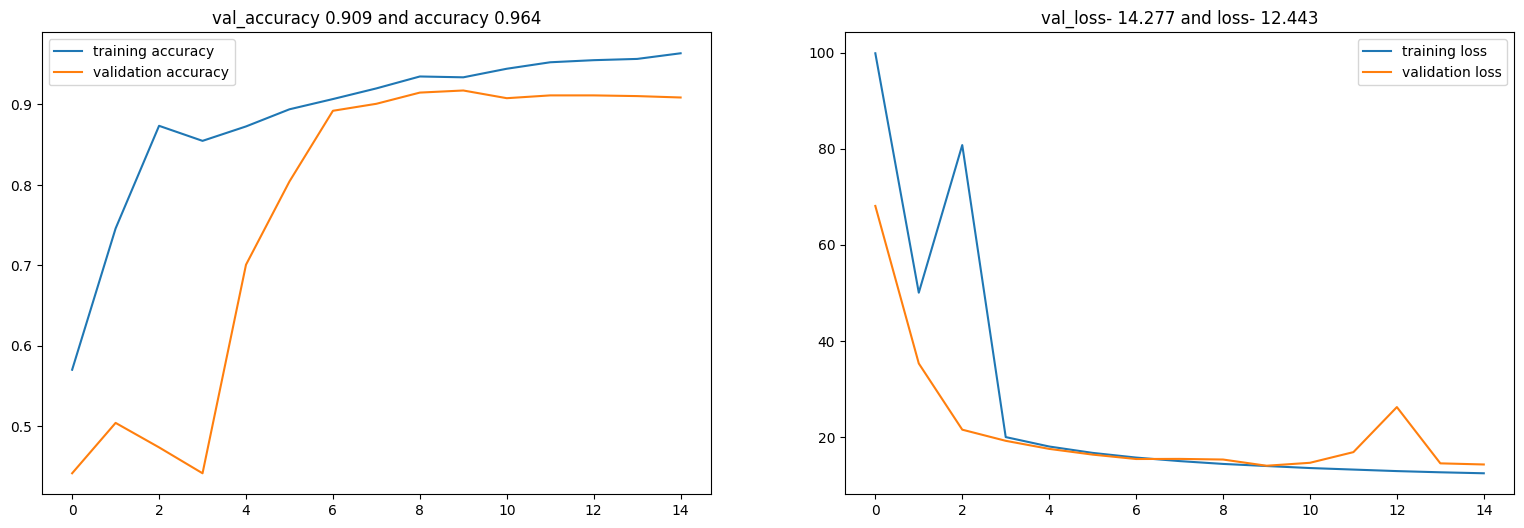

In [ ]:
plt.subplots(nrows=1,ncols=2,figsize = (19,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])   
plt.legend(['training accuracy','validation accuracy'])
plt.title(f'val_accuracy {round(history.history["val_accuracy"][14],ndigits=3)} and accuracy {round(history.history["accuracy"][14],ndigits=3)}')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.title(f'val_loss- {round(history.history["val_loss"][14],ndigits=3)} and loss- {round(history.history["loss"][14],ndigits=3)}')